In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

merged_df = pd.read_csv("./full_dataset.csv")

Optymalna liczba drzew: 140


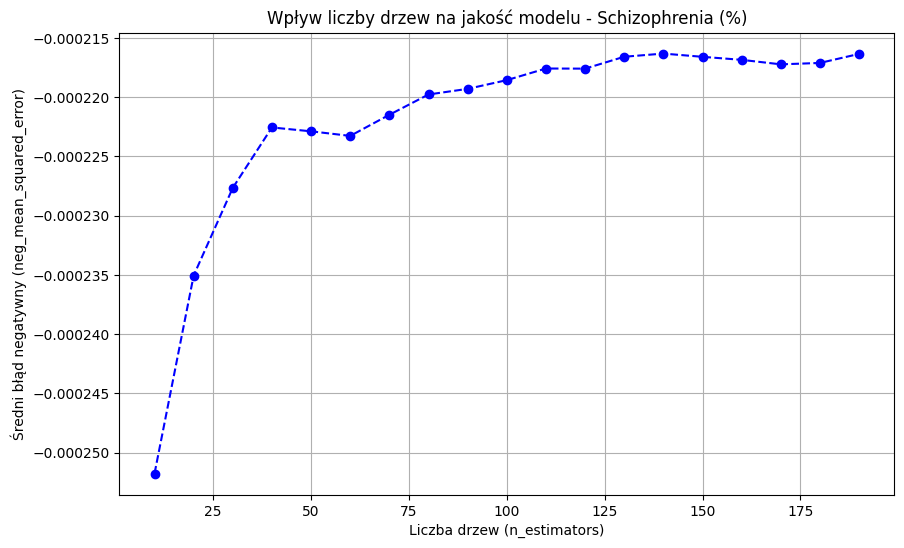

Optymalna maksymalna głębokość: 19


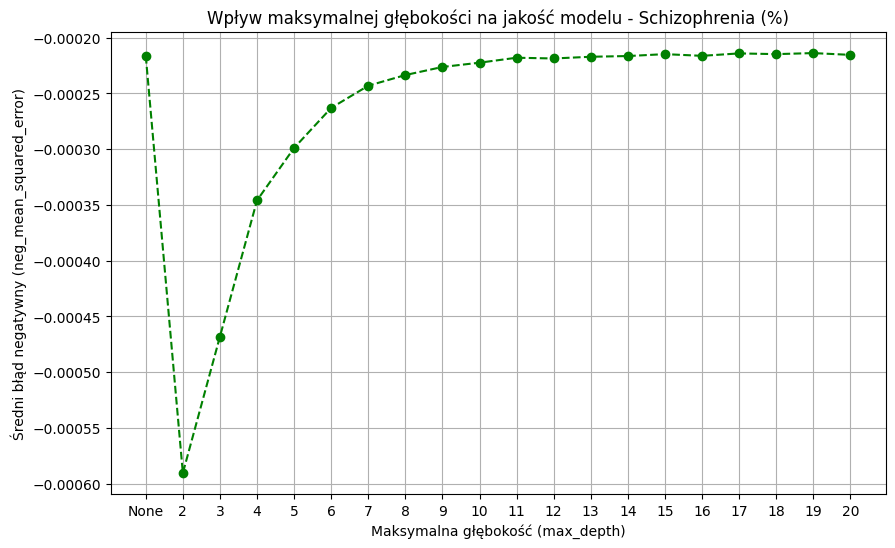

MSE: 0.0001968609083935017
RMSE: 0.014030713039382628
R²: 0.9087334176532424


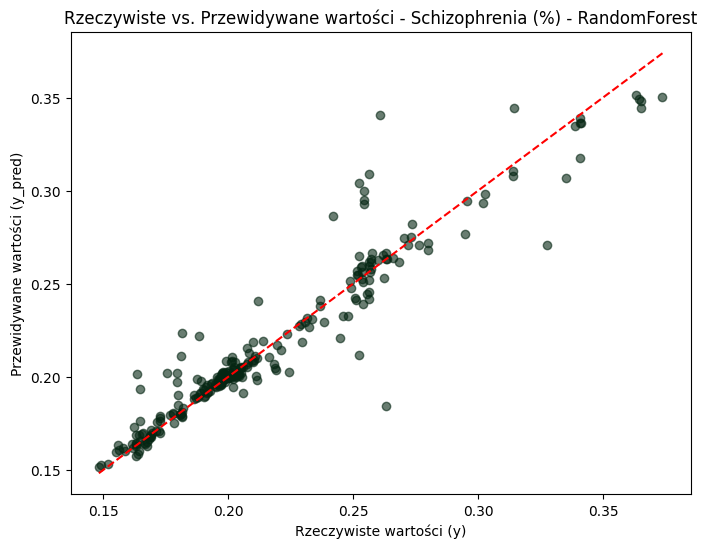

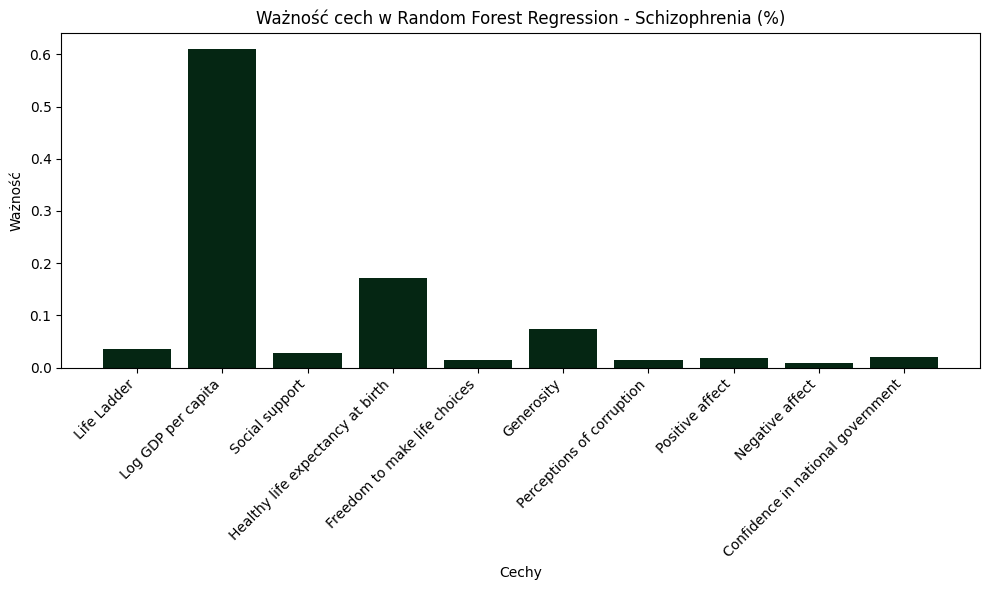

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

cleared_df = merged_df.dropna(subset=[
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity', 
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government',
    'Schizophrenia (%)'
])

X = cleared_df[[
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity',                  
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government'
]]
y = cleared_df['Schizophrenia (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Automatyczne dobieranie liczby drzew
n_estimators_range = range(10, 200, 10)
mean_scores = []

for n in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_scores.append(np.mean(scores))

optimal_n_estimators = n_estimators_range[np.argmax(mean_scores)]
print(f"Optymalna liczba drzew: {optimal_n_estimators}")

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mean_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Liczba drzew (n_estimators)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ liczby drzew na jakość modelu - Schizophrenia (%)')
plt.grid()
plt.show()

# Automatyczne dobieranie maksymalnej głębokości
max_depth_range = [None] + list(range(2, 21))
mean_scores_depth = []

for depth in max_depth_range:
    model = RandomForestRegressor(n_estimators=optimal_n_estimators, max_depth=depth, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_scores_depth.append(np.mean(scores))

optimal_max_depth = max_depth_range[np.argmax(mean_scores_depth)]
print(f"Optymalna maksymalna głębokość: {optimal_max_depth}")

plt.figure(figsize=(10, 6))
plt.plot([str(d) for d in max_depth_range], mean_scores_depth, marker='o', linestyle='--', color='g')
plt.xlabel('Maksymalna głębokość (max_depth)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ maksymalnej głębokości na jakość modelu - Schizophrenia (%)')
plt.grid()
plt.show()

# Finalny model z optymalnymi parametrami
model = RandomForestRegressor(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, random_state=42)
model.fit(X_train_scaled, y_train)

# Predykcja i ocena
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#052613', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Rzeczywiste vs. Przewidywane wartości - Schizophrenia (%) - RandomForest')
plt.xlabel('Rzeczywiste wartości (y)')
plt.ylabel('Przewidywane wartości (y_pred)')
plt.show()

# Ważność cech
feature_importances = model.feature_importances_

feature_names = [
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity',                  
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government'
]

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances, color='#052613')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cechy')
plt.ylabel('Ważność')
plt.title('Ważność cech w Random Forest Regression - Schizophrenia (%)')
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=2, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=3, we

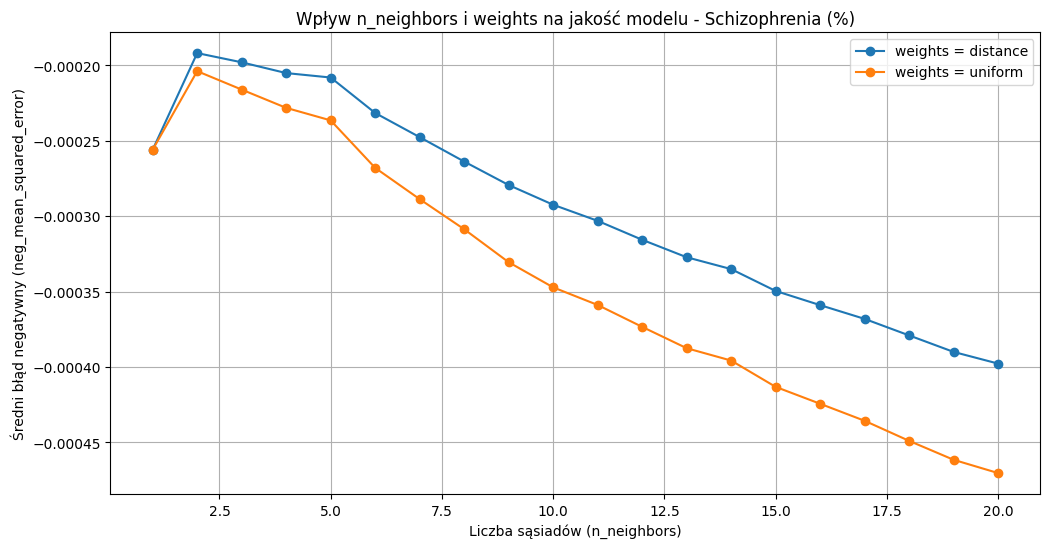

MSE: 0.00017602588673920296
RMSE: 0.013267474768741901
R²: 0.9183927310996052


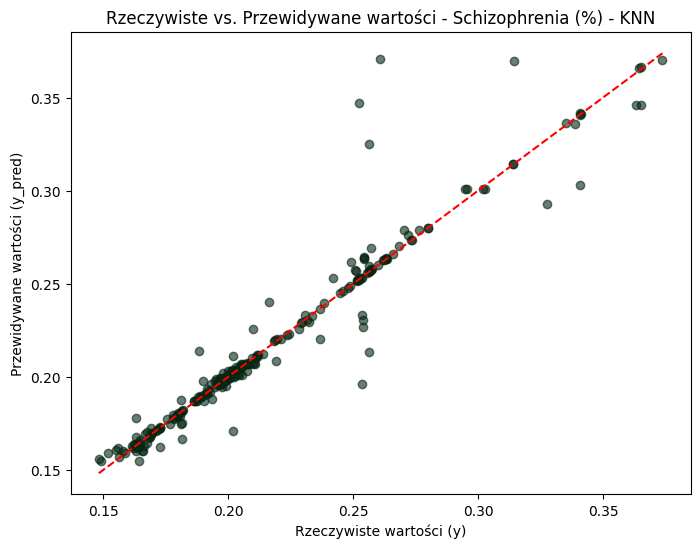

In [9]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Przestrzeń hiperparametrów dla KNeighborsRegressor
param_grid_knn = {
    'n_neighbors': range(1, 21),             # Liczba sąsiadów od 1 do 20
    'weights': ['uniform', 'distance']      # Rodzaj wag
}

# Grid Search dla KNN
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, return_train_score=True)
grid_search_knn.fit(X_train_scaled, y_train)

# Najlepsze parametry dla KNN
best_params_knn = grid_search_knn.best_params_
print(f"Najlepsze parametry dla KNN: {best_params_knn}")

# Uzyskanie wyników z GridSearchCV
results = grid_search_knn.cv_results_

# Konwersja wyników do tablic NumPy dla łatwiejszej analizy
mean_test_scores = results['mean_test_score']
param_n_neighbors = np.array(results['param_n_neighbors'], dtype=int)
param_weights = np.array(results['param_weights'], dtype=str)

# Wizualizacja wyników dla każdego rodzaju wag
plt.figure(figsize=(12, 6))
for weight in np.unique(param_weights):
    mask = param_weights == weight
    plt.plot(
        param_n_neighbors[mask],
        mean_test_scores[mask],
        marker='o',
        label=f'weights = {weight}'
    )

plt.xlabel('Liczba sąsiadów (n_neighbors)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ n_neighbors i weights na jakość modelu - Schizophrenia (%)')
plt.legend()
plt.grid()
plt.show()

# Ocena modelu z najlepszymi parametrami
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# Obliczanie metryk
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mse_knn ** 0.5
r2_knn = r2_score(y_test, y_pred_knn)

print(f"MSE: {mse_knn}")
print(f"RMSE: {rmse_knn}")
print(f"R²: {r2_knn}")

# Wykres: Rzeczywiste vs Przewidywane wartości
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='#052613', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Rzeczywiste vs. Przewidywane wartości - Schizophrenia (%) - KNN')
plt.xlabel('Rzeczywiste wartości (y)')
plt.ylabel('Przewidywane wartości (y_pred)')
plt.show()



Optymalna liczba drzew: 80


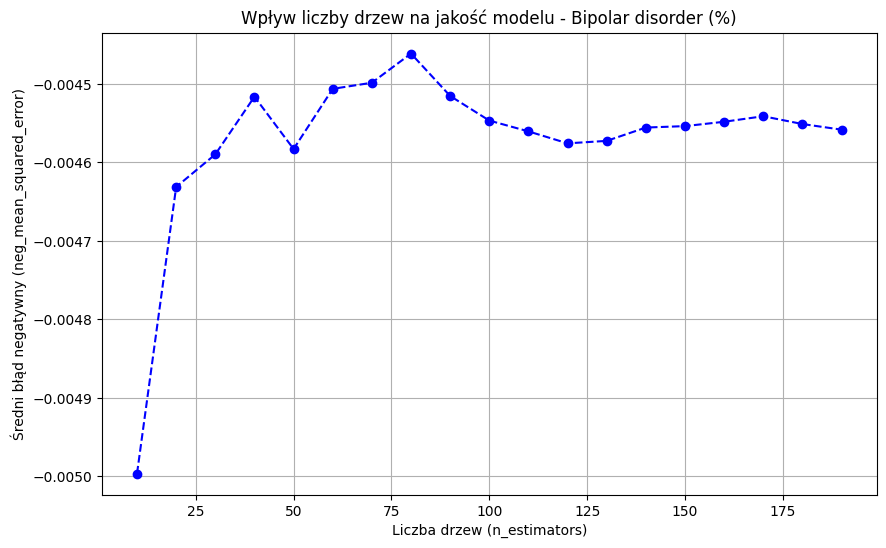

Optymalna maksymalna głębokość: 14


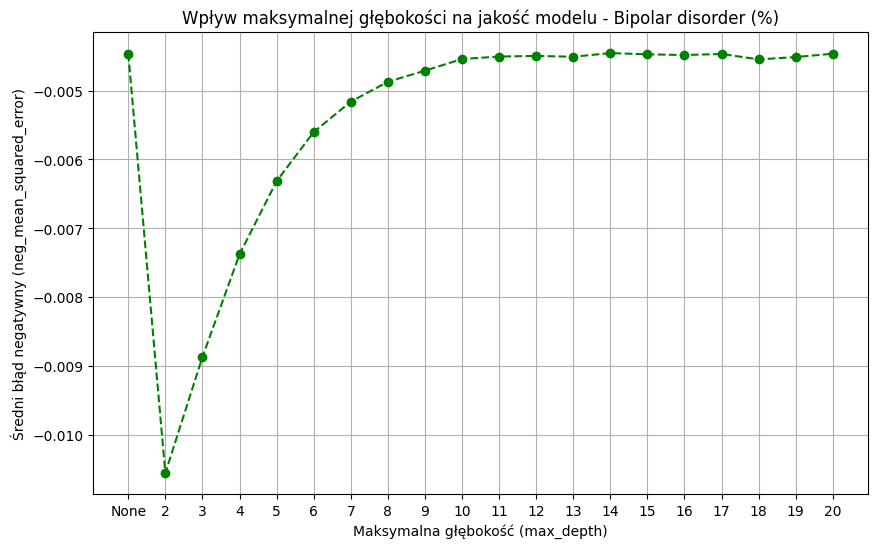

MSE: 0.0026308332123185225
RMSE: 0.051291648563080154
R²: 0.8976491865268288


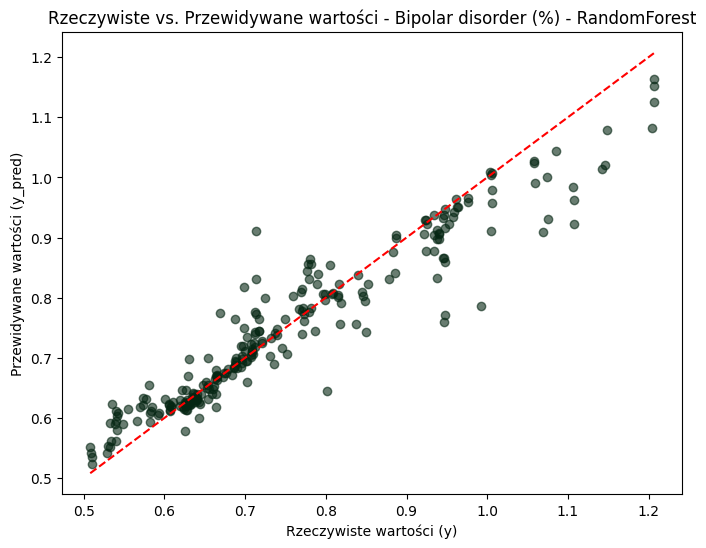

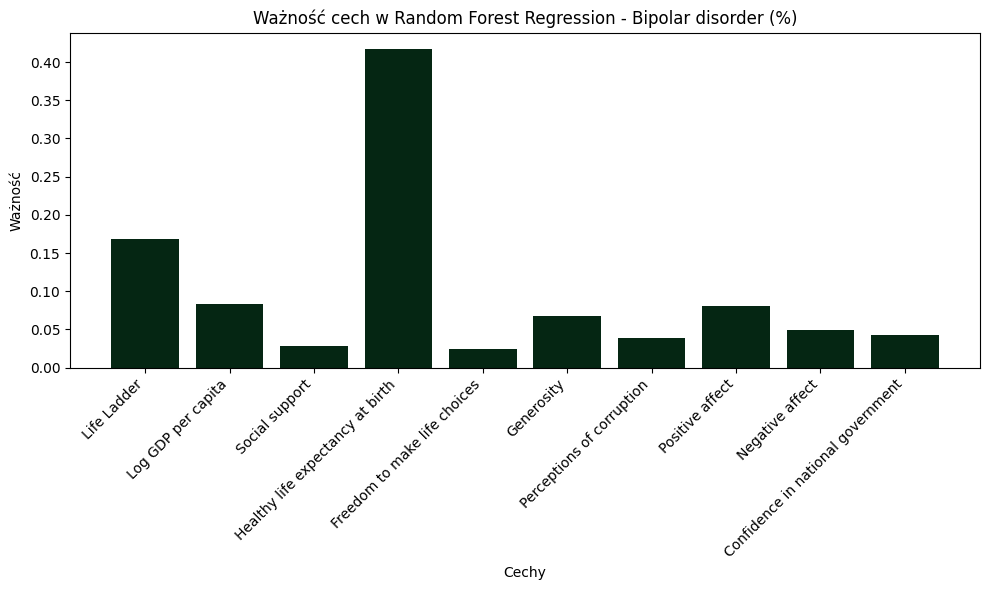

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

cleared_df = merged_df.dropna(subset=[
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity', 
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government',
    'Bipolar disorder (%)'
])

X = cleared_df[[
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity',                  
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government'
]]
y = cleared_df['Bipolar disorder (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Automatyczne dobieranie liczby drzew
n_estimators_range = range(10, 200, 10)
mean_scores = []

for n in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_scores.append(np.mean(scores))

optimal_n_estimators = n_estimators_range[np.argmax(mean_scores)]
print(f"Optymalna liczba drzew: {optimal_n_estimators}")

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mean_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Liczba drzew (n_estimators)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ liczby drzew na jakość modelu - Bipolar disorder (%)')
plt.grid()
plt.show()

# Automatyczne dobieranie maksymalnej głębokości
max_depth_range = [None] + list(range(2, 21))
mean_scores_depth = []

for depth in max_depth_range:
    model = RandomForestRegressor(n_estimators=optimal_n_estimators, max_depth=depth, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_scores_depth.append(np.mean(scores))

optimal_max_depth = max_depth_range[np.argmax(mean_scores_depth)]
print(f"Optymalna maksymalna głębokość: {optimal_max_depth}")

plt.figure(figsize=(10, 6))
plt.plot([str(d) for d in max_depth_range], mean_scores_depth, marker='o', linestyle='--', color='g')
plt.xlabel('Maksymalna głębokość (max_depth)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ maksymalnej głębokości na jakość modelu - Bipolar disorder (%)')
plt.grid()
plt.show()

# Finalny model z optymalnymi parametrami
model = RandomForestRegressor(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, random_state=42)
model.fit(X_train_scaled, y_train)

# Predykcja i ocena
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#052613', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Rzeczywiste vs. Przewidywane wartości - Bipolar disorder (%) - RandomForest')
plt.xlabel('Rzeczywiste wartości (y)')
plt.ylabel('Przewidywane wartości (y_pred)')
plt.show()

# Ważność cech
feature_importances = model.feature_importances_

feature_names = [
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity',                  
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government'
]

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances, color='#052613')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cechy')
plt.ylabel('Ważność')
plt.title('Ważność cech w Random Forest Regression - Bipolar disorder (%)')
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, we

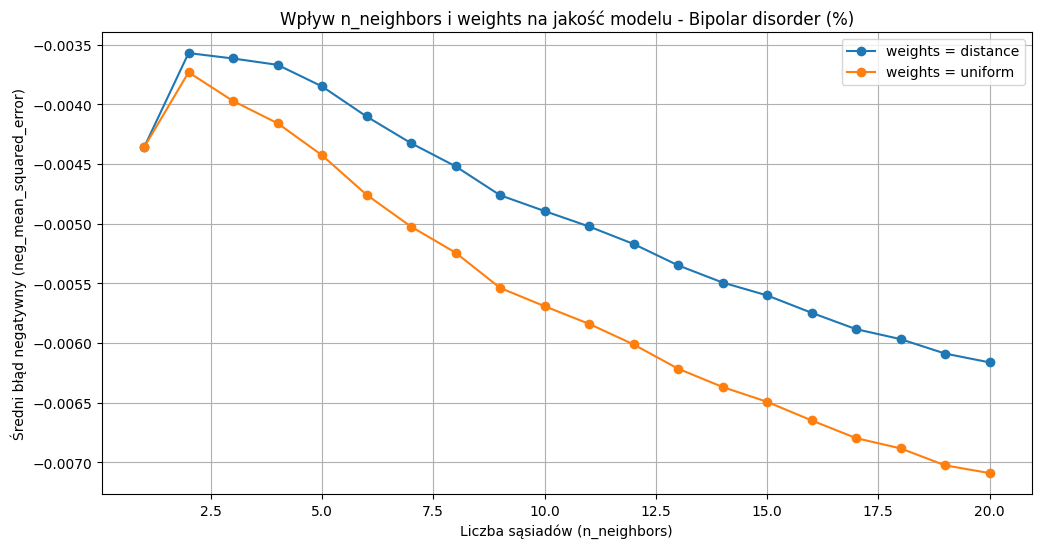

MSE: 0.00265345277423993
RMSE: 0.051511676096201046
R²: 0.8967691875393511


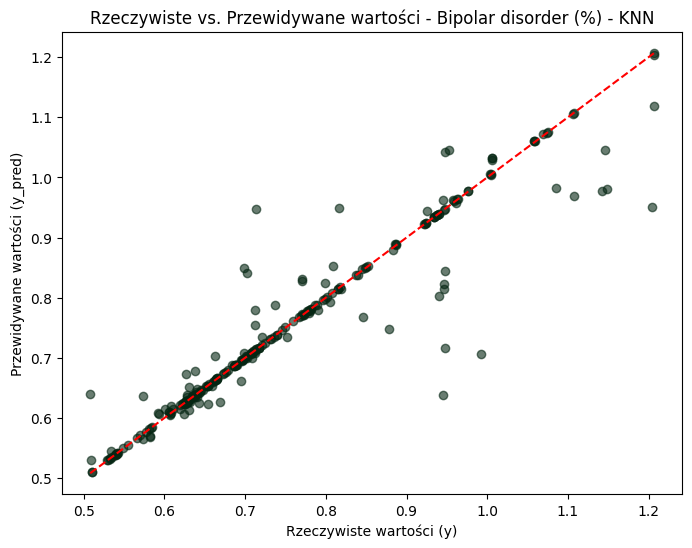

In [11]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Przestrzeń hiperparametrów dla KNeighborsRegressor
param_grid_knn = {
    'n_neighbors': range(1, 21),             # Liczba sąsiadów od 1 do 20
    'weights': ['uniform', 'distance']      # Rodzaj wag
}

# Grid Search dla KNN
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, return_train_score=True)
grid_search_knn.fit(X_train_scaled, y_train)

# Najlepsze parametry dla KNN
best_params_knn = grid_search_knn.best_params_
print(f"Najlepsze parametry dla KNN: {best_params_knn}")

# Uzyskanie wyników z GridSearchCV
results = grid_search_knn.cv_results_

mean_test_scores = results['mean_test_score']
param_n_neighbors = np.array(results['param_n_neighbors'], dtype=int)
param_weights = np.array(results['param_weights'], dtype=str)

# Wizualizacja wyników dla każdego rodzaju wag
plt.figure(figsize=(12, 6))
for weight in np.unique(param_weights):
    mask = param_weights == weight
    plt.plot(
        param_n_neighbors[mask],
        mean_test_scores[mask],
        marker='o',
        label=f'weights = {weight}'
    )

plt.xlabel('Liczba sąsiadów (n_neighbors)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ n_neighbors i weights na jakość modelu - Bipolar disorder (%)')
plt.legend()
plt.grid()
plt.show()

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# Obliczanie metryk
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mse_knn ** 0.5
r2_knn = r2_score(y_test, y_pred_knn)

print(f"MSE: {mse_knn}")
print(f"RMSE: {rmse_knn}")
print(f"R²: {r2_knn}")

# Wykres: Rzeczywiste vs Przewidywane wartości
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='#052613', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Rzeczywiste vs. Przewidywane wartości - Bipolar disorder (%) - KNN')
plt.xlabel('Rzeczywiste wartości (y)')
plt.ylabel('Przewidywane wartości (y_pred)')
plt.show()



Optymalna liczba drzew: 190


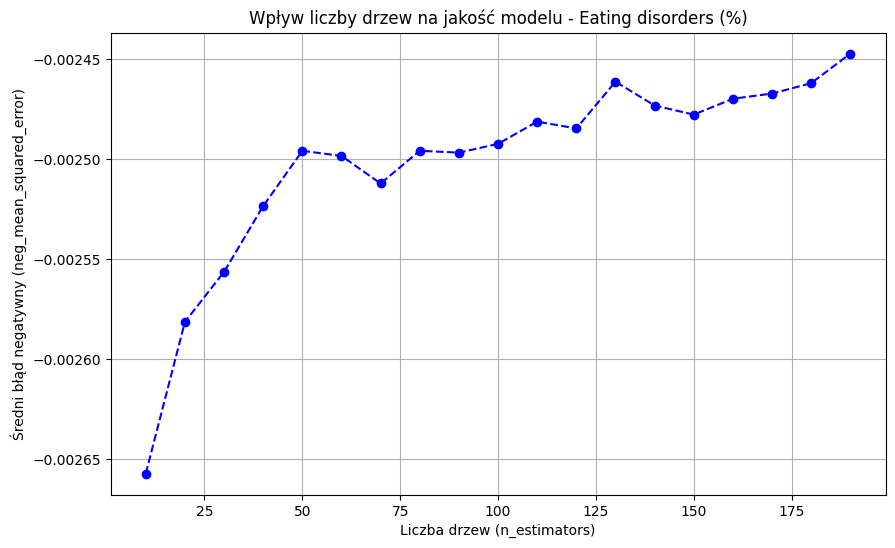

Optymalna maksymalna głębokość: 18


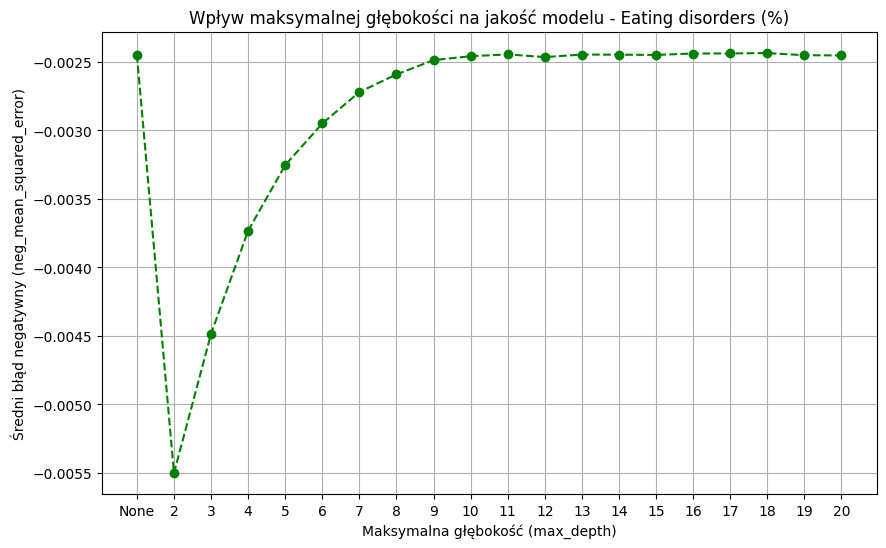

MSE: 0.0023517394090758694
RMSE: 0.04849473589036102
R²: 0.9351297555839644


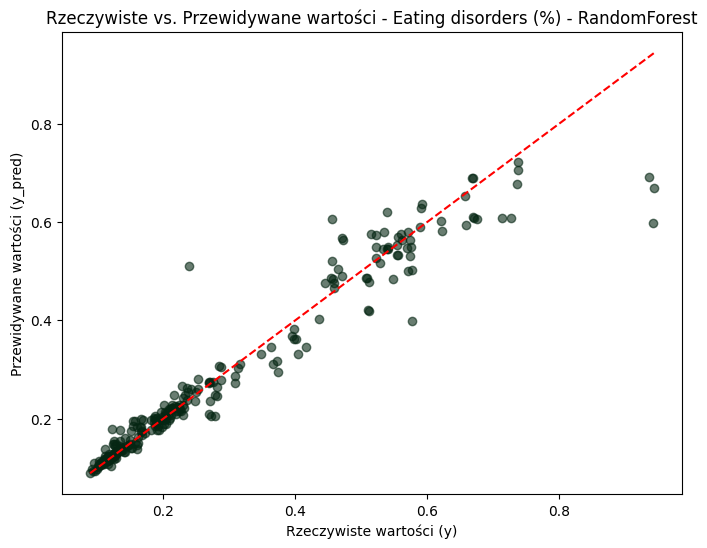

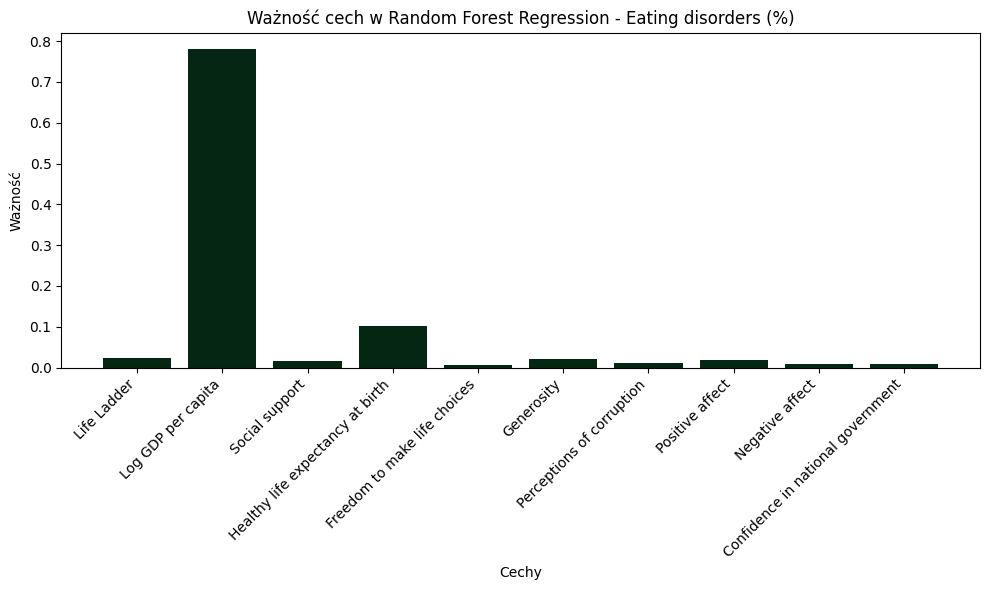

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

cleared_df = merged_df.dropna(subset=[
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity', 
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government',
    'Eating disorders (%)'
])

X = cleared_df[[
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity',                  
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government'
]]
y = cleared_df['Eating disorders (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Automatyczne dobieranie liczby drzew
n_estimators_range = range(10, 200, 10)
mean_scores = []

for n in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_scores.append(np.mean(scores))

optimal_n_estimators = n_estimators_range[np.argmax(mean_scores)]
print(f"Optymalna liczba drzew: {optimal_n_estimators}")

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mean_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Liczba drzew (n_estimators)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ liczby drzew na jakość modelu - Eating disorders (%)')
plt.grid()
plt.show()

# Automatyczne dobieranie maksymalnej głębokości
max_depth_range = [None] + list(range(2, 21))
mean_scores_depth = []

for depth in max_depth_range:
    model = RandomForestRegressor(n_estimators=optimal_n_estimators, max_depth=depth, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_scores_depth.append(np.mean(scores))

optimal_max_depth = max_depth_range[np.argmax(mean_scores_depth)]
print(f"Optymalna maksymalna głębokość: {optimal_max_depth}")

plt.figure(figsize=(10, 6))
plt.plot([str(d) for d in max_depth_range], mean_scores_depth, marker='o', linestyle='--', color='g')
plt.xlabel('Maksymalna głębokość (max_depth)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ maksymalnej głębokości na jakość modelu - Eating disorders (%)')
plt.grid()
plt.show()

# Finalny model z optymalnymi parametrami
model = RandomForestRegressor(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, random_state=42)
model.fit(X_train_scaled, y_train)

# Predykcja i ocena
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#052613', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Rzeczywiste vs. Przewidywane wartości - Eating disorders (%) - RandomForest')
plt.xlabel('Rzeczywiste wartości (y)')
plt.ylabel('Przewidywane wartości (y_pred)')
plt.show()

# Ważność cech
feature_importances = model.feature_importances_

feature_names = [
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity',                  
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government'
]

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances, color='#052613')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cechy')
plt.ylabel('Ważność')
plt.title('Ważność cech w Random Forest Regression - Eating disorders (%)')
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, we

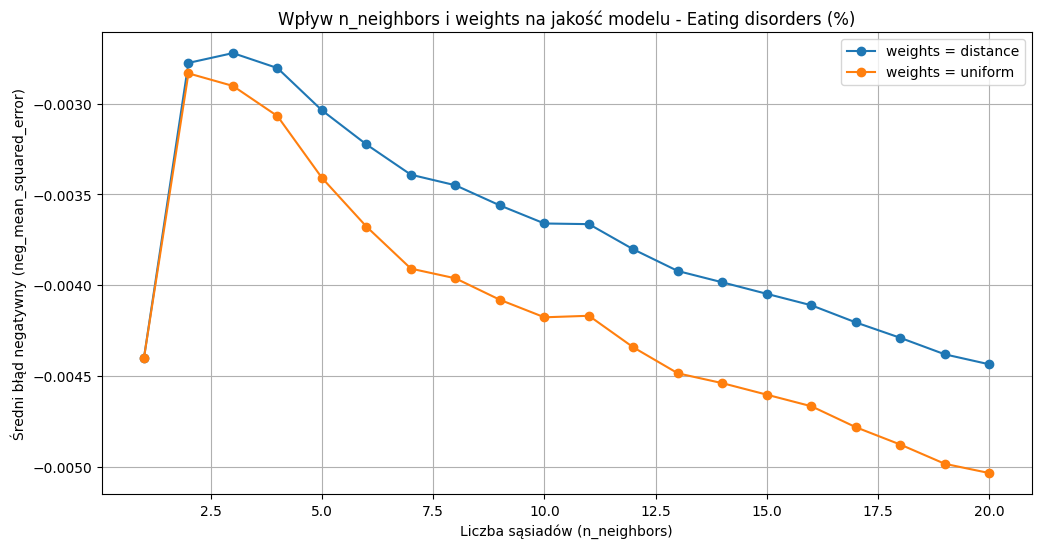

MSE: 0.0025723482250754226
RMSE: 0.05071832238033335
R²: 0.9290444947089737


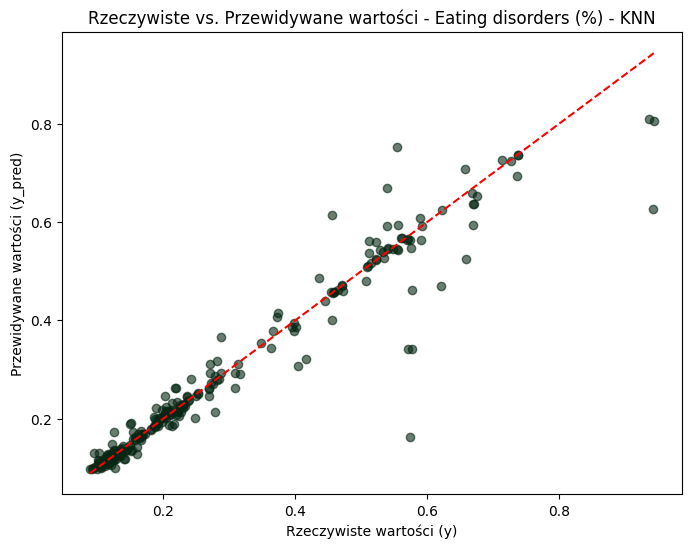

In [13]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Przestrzeń hiperparametrów dla KNeighborsRegressor
param_grid_knn = {
    'n_neighbors': range(1, 21),             # Liczba sąsiadów od 1 do 20
    'weights': ['uniform', 'distance']      # Rodzaj wag
}

# Grid Search dla KNN
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, return_train_score=True)
grid_search_knn.fit(X_train_scaled, y_train)

# Najlepsze parametry dla KNN
best_params_knn = grid_search_knn.best_params_
print(f"Najlepsze parametry dla KNN: {best_params_knn}")

# Uzyskanie wyników z GridSearchCV
results = grid_search_knn.cv_results_

mean_test_scores = results['mean_test_score']
param_n_neighbors = np.array(results['param_n_neighbors'], dtype=int)
param_weights = np.array(results['param_weights'], dtype=str)

# Wizualizacja wyników dla każdego rodzaju wag
plt.figure(figsize=(12, 6))
for weight in np.unique(param_weights):
    mask = param_weights == weight
    plt.plot(
        param_n_neighbors[mask],
        mean_test_scores[mask],
        marker='o',
        label=f'weights = {weight}'
    )

plt.xlabel('Liczba sąsiadów (n_neighbors)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ n_neighbors i weights na jakość modelu - Eating disorders (%)')
plt.legend()
plt.grid()
plt.show()

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# Obliczanie metryk
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mse_knn ** 0.5
r2_knn = r2_score(y_test, y_pred_knn)

print(f"MSE: {mse_knn}")
print(f"RMSE: {rmse_knn}")
print(f"R²: {r2_knn}")

# Wykres: Rzeczywiste vs Przewidywane wartości
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='#052613', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Rzeczywiste vs. Przewidywane wartości - Eating disorders (%) - KNN')
plt.xlabel('Rzeczywiste wartości (y)')
plt.ylabel('Przewidywane wartości (y_pred)')
plt.show()

Optymalna liczba drzew: 190


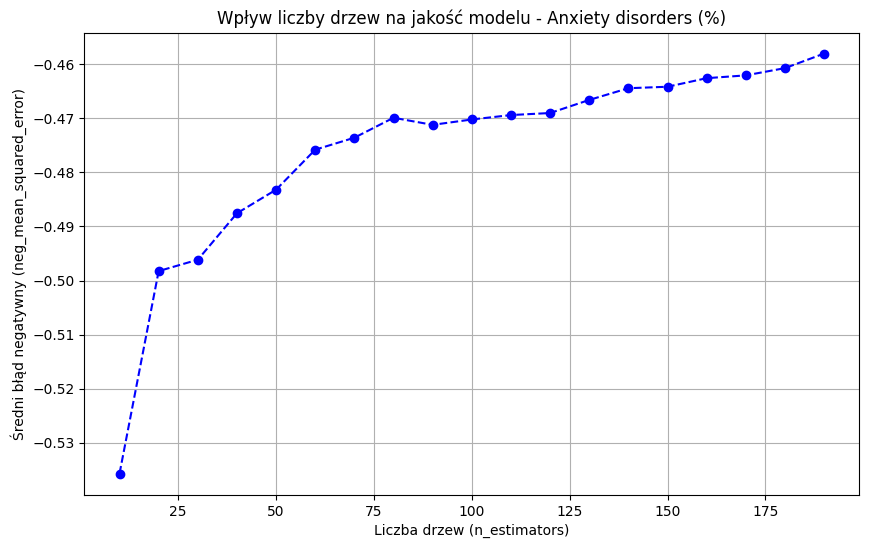

Optymalna maksymalna głębokość: None


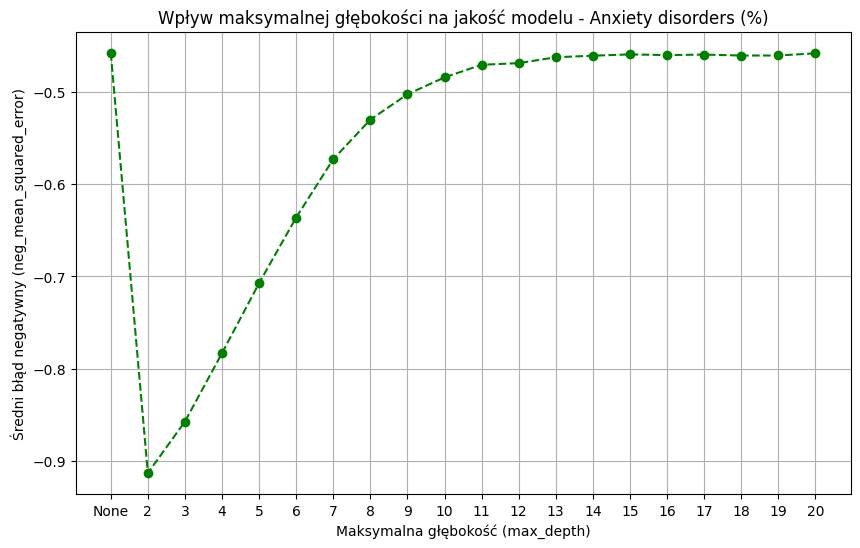

MSE: 0.3725690906829186
RMSE: 0.6103843794552074
R²: 0.8088309998030456


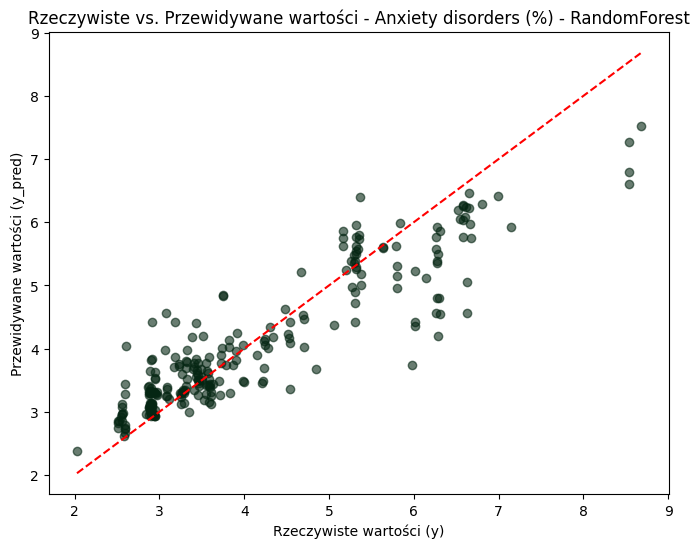

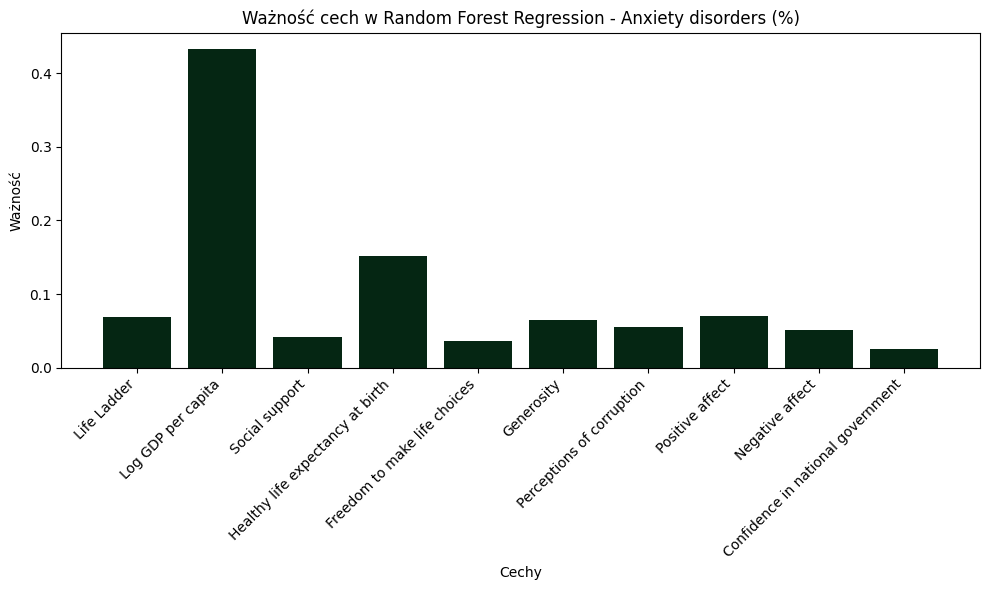

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

cleared_df = merged_df.dropna(subset=[
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity', 
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government',
    'Anxiety disorders (%)'
])

X = cleared_df[[
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity',                  
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government'
]]
y = cleared_df['Anxiety disorders (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Automatyczne dobieranie liczby drzew
n_estimators_range = range(10, 200, 10)
mean_scores = []

for n in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_scores.append(np.mean(scores))

optimal_n_estimators = n_estimators_range[np.argmax(mean_scores)]
print(f"Optymalna liczba drzew: {optimal_n_estimators}")

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mean_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Liczba drzew (n_estimators)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ liczby drzew na jakość modelu - Anxiety disorders (%)')
plt.grid()
plt.show()

# Automatyczne dobieranie maksymalnej głębokości
max_depth_range = [None] + list(range(2, 21))
mean_scores_depth = []

for depth in max_depth_range:
    model = RandomForestRegressor(n_estimators=optimal_n_estimators, max_depth=depth, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_scores_depth.append(np.mean(scores))

optimal_max_depth = max_depth_range[np.argmax(mean_scores_depth)]
print(f"Optymalna maksymalna głębokość: {optimal_max_depth}")

plt.figure(figsize=(10, 6))
plt.plot([str(d) for d in max_depth_range], mean_scores_depth, marker='o', linestyle='--', color='g')
plt.xlabel('Maksymalna głębokość (max_depth)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ maksymalnej głębokości na jakość modelu - Anxiety disorders (%)')
plt.grid()
plt.show()

# Finalny model z optymalnymi parametrami
model = RandomForestRegressor(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, random_state=42)
model.fit(X_train_scaled, y_train)

# Predykcja i ocena
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#052613', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Rzeczywiste vs. Przewidywane wartości - Anxiety disorders (%) - RandomForest')
plt.xlabel('Rzeczywiste wartości (y)')
plt.ylabel('Przewidywane wartości (y_pred)')
plt.show()

# Ważność cech
feature_importances = model.feature_importances_

feature_names = [
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity',                  
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government'
]

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances, color='#052613')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cechy')
plt.ylabel('Ważność')
plt.title('Ważność cech w Random Forest Regression - Anxiety disorders (%)')
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, we

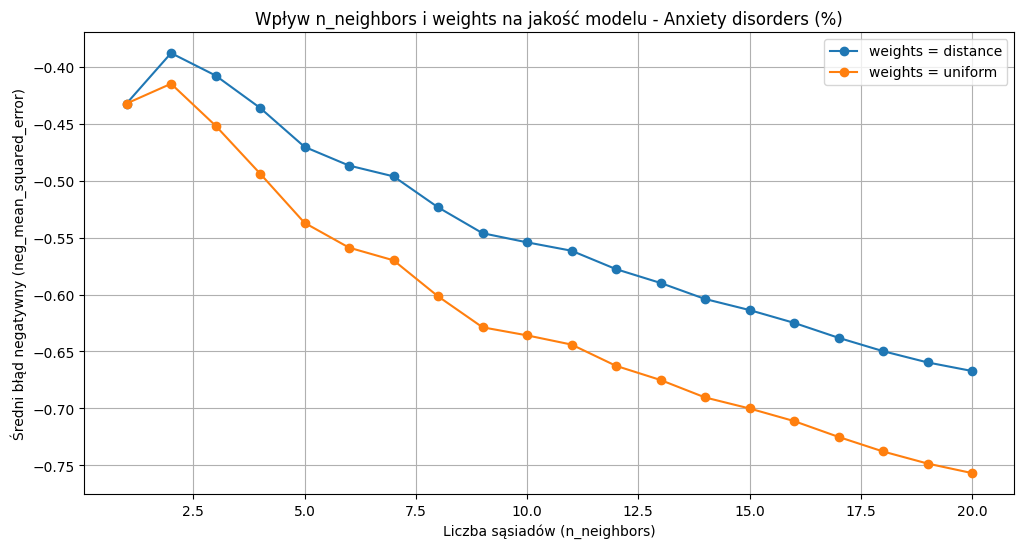

MSE: 0.322365700470322
RMSE: 0.567772578124659
R²: 0.8345908713368


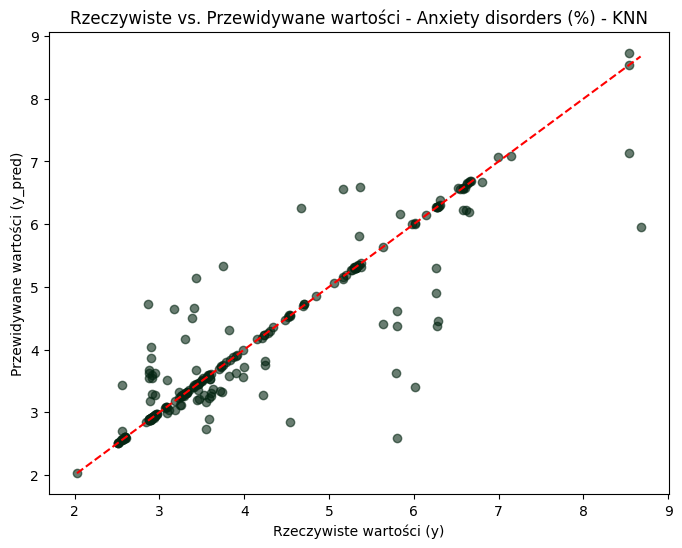

In [15]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Przestrzeń hiperparametrów dla KNeighborsRegressor
param_grid_knn = {
    'n_neighbors': range(1, 21),             # Liczba sąsiadów od 1 do 20
    'weights': ['uniform', 'distance']      # Rodzaj wag
}

# Grid Search dla KNN
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, return_train_score=True)
grid_search_knn.fit(X_train_scaled, y_train)

# Najlepsze parametry dla KNN
best_params_knn = grid_search_knn.best_params_
print(f"Najlepsze parametry dla KNN: {best_params_knn}")

# Uzyskanie wyników z GridSearchCV
results = grid_search_knn.cv_results_

mean_test_scores = results['mean_test_score']
param_n_neighbors = np.array(results['param_n_neighbors'], dtype=int)
param_weights = np.array(results['param_weights'], dtype=str)

# Wizualizacja wyników dla każdego rodzaju wag
plt.figure(figsize=(12, 6))
for weight in np.unique(param_weights):
    mask = param_weights == weight
    plt.plot(
        param_n_neighbors[mask],
        mean_test_scores[mask],
        marker='o',
        label=f'weights = {weight}'
    )

plt.xlabel('Liczba sąsiadów (n_neighbors)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ n_neighbors i weights na jakość modelu - Anxiety disorders (%)')
plt.legend()
plt.grid()
plt.show()

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# Obliczanie metryk
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mse_knn ** 0.5
r2_knn = r2_score(y_test, y_pred_knn)

print(f"MSE: {mse_knn}")
print(f"RMSE: {rmse_knn}")
print(f"R²: {r2_knn}")

# Wykres: Rzeczywiste vs Przewidywane wartości
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='#052613', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Rzeczywiste vs. Przewidywane wartości - Anxiety disorders (%) - KNN')
plt.xlabel('Rzeczywiste wartości (y)')
plt.ylabel('Przewidywane wartości (y_pred)')
plt.show()

Optymalna liczba drzew: 170


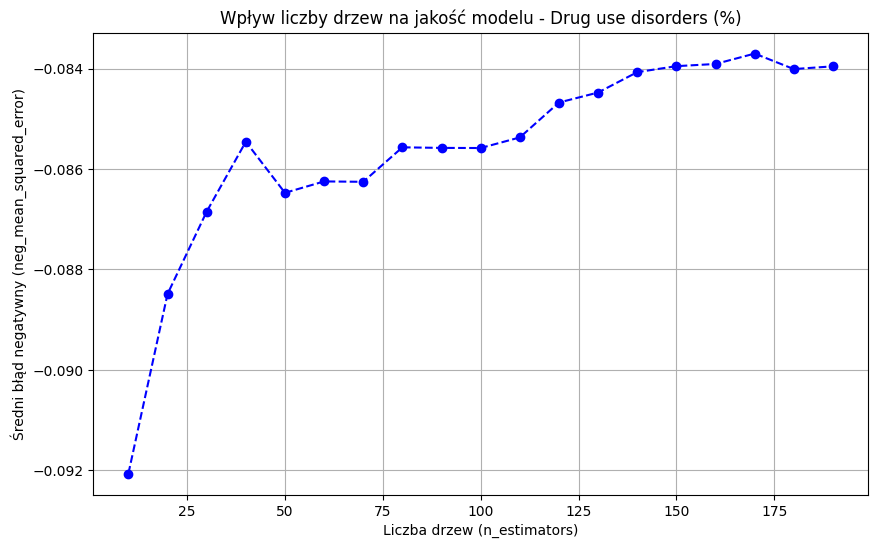

Optymalna maksymalna głębokość: None


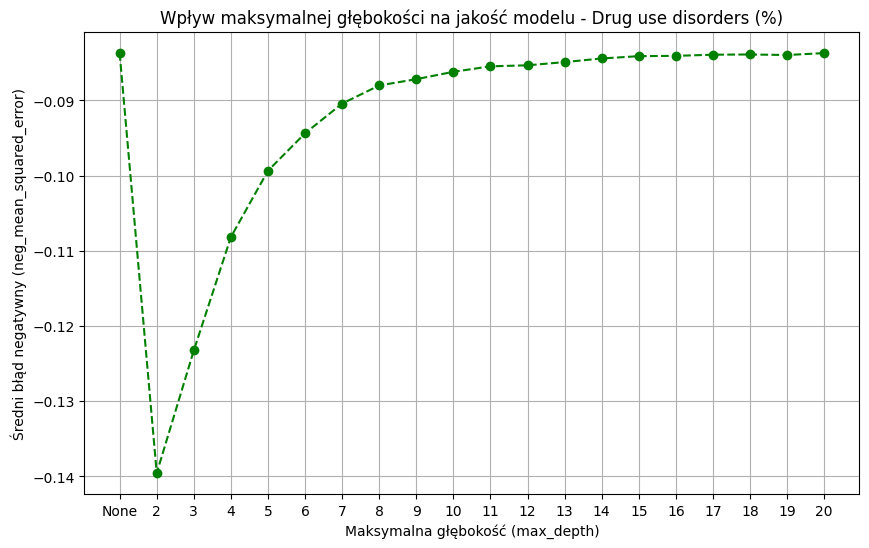

MSE: 0.037117591359516554
RMSE: 0.19265926232474928
R²: 0.8204280435206973


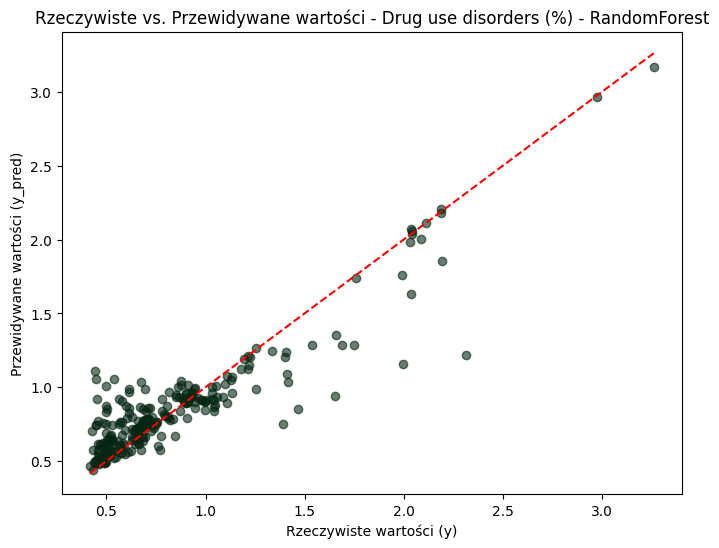

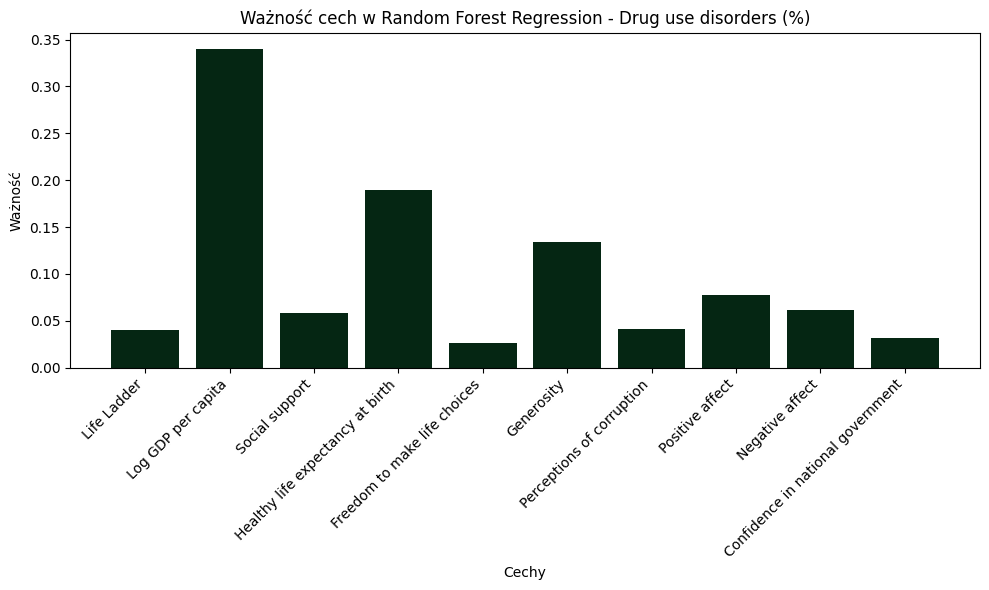

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

cleared_df = merged_df.dropna(subset=[
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity', 
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government',
    'Drug use disorders (%)'
])

X = cleared_df[[
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity',                  
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government'
]]
y = cleared_df['Drug use disorders (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Automatyczne dobieranie liczby drzew
n_estimators_range = range(10, 200, 10)
mean_scores = []

for n in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_scores.append(np.mean(scores))

optimal_n_estimators = n_estimators_range[np.argmax(mean_scores)]
print(f"Optymalna liczba drzew: {optimal_n_estimators}")

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mean_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Liczba drzew (n_estimators)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ liczby drzew na jakość modelu - Drug use disorders (%)')
plt.grid()
plt.show()

# Automatyczne dobieranie maksymalnej głębokości
max_depth_range = [None] + list(range(2, 21))
mean_scores_depth = []

for depth in max_depth_range:
    model = RandomForestRegressor(n_estimators=optimal_n_estimators, max_depth=depth, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_scores_depth.append(np.mean(scores))

optimal_max_depth = max_depth_range[np.argmax(mean_scores_depth)]
print(f"Optymalna maksymalna głębokość: {optimal_max_depth}")

plt.figure(figsize=(10, 6))
plt.plot([str(d) for d in max_depth_range], mean_scores_depth, marker='o', linestyle='--', color='g')
plt.xlabel('Maksymalna głębokość (max_depth)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ maksymalnej głębokości na jakość modelu - Drug use disorders (%)')
plt.grid()
plt.show()

# Finalny model z optymalnymi parametrami
model = RandomForestRegressor(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, random_state=42)
model.fit(X_train_scaled, y_train)

# Predykcja i ocena
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#052613', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Rzeczywiste vs. Przewidywane wartości - Drug use disorders (%) - RandomForest')
plt.xlabel('Rzeczywiste wartości (y)')
plt.ylabel('Przewidywane wartości (y_pred)')
plt.show()

# Ważność cech
feature_importances = model.feature_importances_

feature_names = [
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity',                  
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government'
]

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances, color='#052613')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cechy')
plt.ylabel('Ważność')
plt.title('Ważność cech w Random Forest Regression - Drug use disorders (%)')
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, we

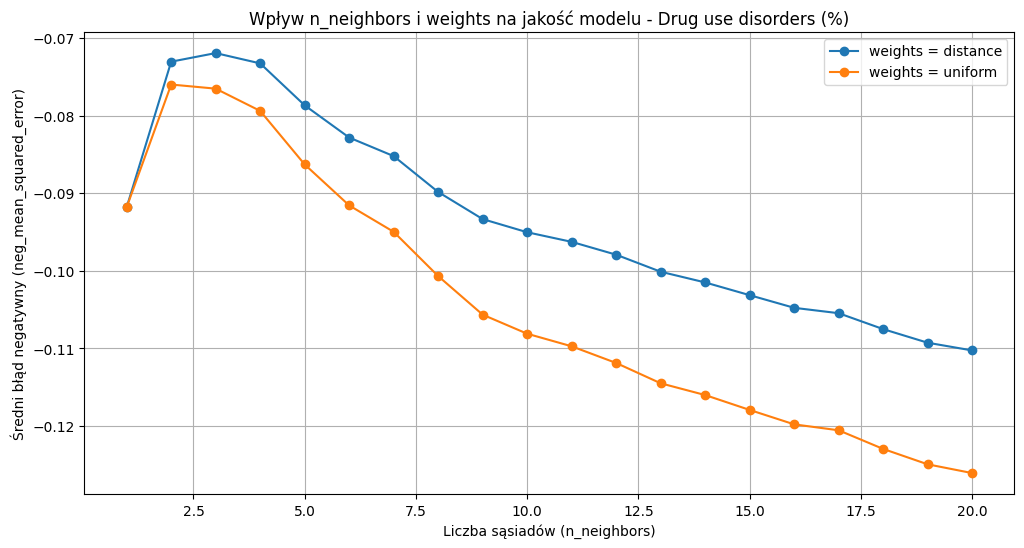

MSE: 0.0477151739050197
RMSE: 0.21843803218537677
R²: 0.7691577815790105


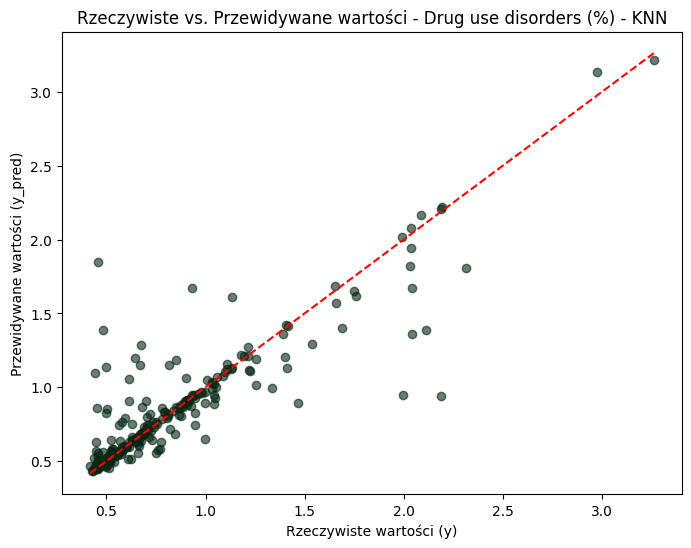

In [17]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Przestrzeń hiperparametrów dla KNeighborsRegressor
param_grid_knn = {
    'n_neighbors': range(1, 21),             # Liczba sąsiadów od 1 do 20
    'weights': ['uniform', 'distance']      # Rodzaj wag
}

# Grid Search dla KNN
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, return_train_score=True)
grid_search_knn.fit(X_train_scaled, y_train)

# Najlepsze parametry dla KNN
best_params_knn = grid_search_knn.best_params_
print(f"Najlepsze parametry dla KNN: {best_params_knn}")

# Uzyskanie wyników z GridSearchCV
results = grid_search_knn.cv_results_

mean_test_scores = results['mean_test_score']
param_n_neighbors = np.array(results['param_n_neighbors'], dtype=int)
param_weights = np.array(results['param_weights'], dtype=str)

# Wizualizacja wyników dla każdego rodzaju wag
plt.figure(figsize=(12, 6))
for weight in np.unique(param_weights):
    mask = param_weights == weight
    plt.plot(
        param_n_neighbors[mask],
        mean_test_scores[mask],
        marker='o',
        label=f'weights = {weight}'
    )

plt.xlabel('Liczba sąsiadów (n_neighbors)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ n_neighbors i weights na jakość modelu - Drug use disorders (%)')
plt.legend()
plt.grid()
plt.show()

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# Obliczanie metryk
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mse_knn ** 0.5
r2_knn = r2_score(y_test, y_pred_knn)

print(f"MSE: {mse_knn}")
print(f"RMSE: {rmse_knn}")
print(f"R²: {r2_knn}")

# Wykres: Rzeczywiste vs Przewidywane wartości
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='#052613', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Rzeczywiste vs. Przewidywane wartości - Drug use disorders (%) - KNN')
plt.xlabel('Rzeczywiste wartości (y)')
plt.ylabel('Przewidywane wartości (y_pred)')
plt.show()

Optymalna liczba drzew: 160


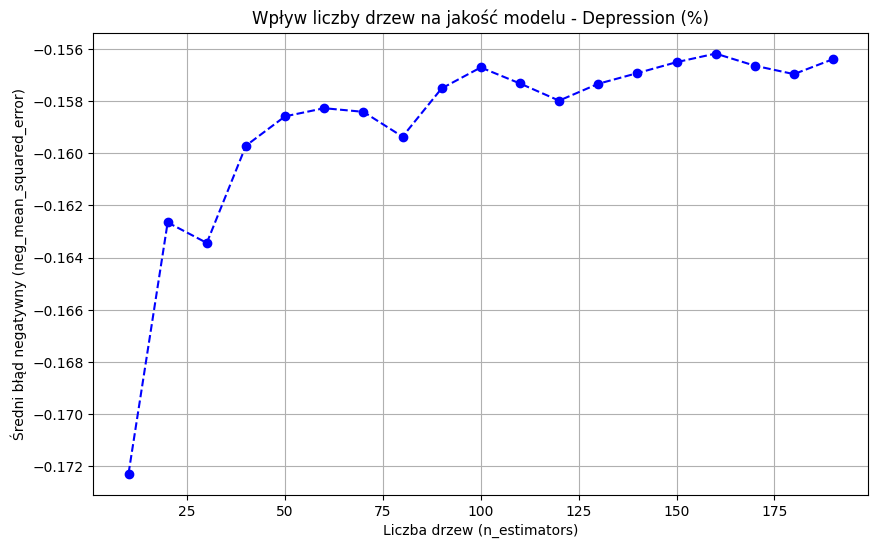

Optymalna maksymalna głębokość: 19


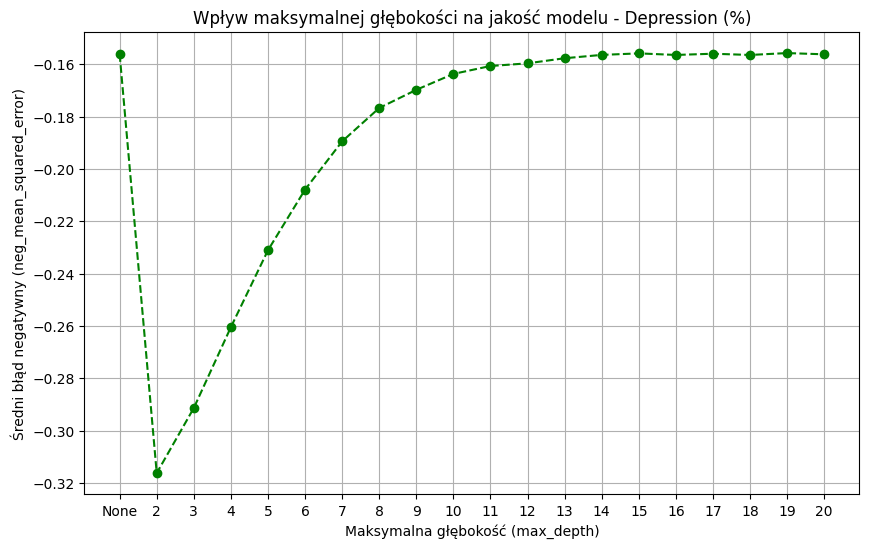

MSE: 0.09472188287233373
RMSE: 0.30776920390502643
R²: 0.7561887644591286


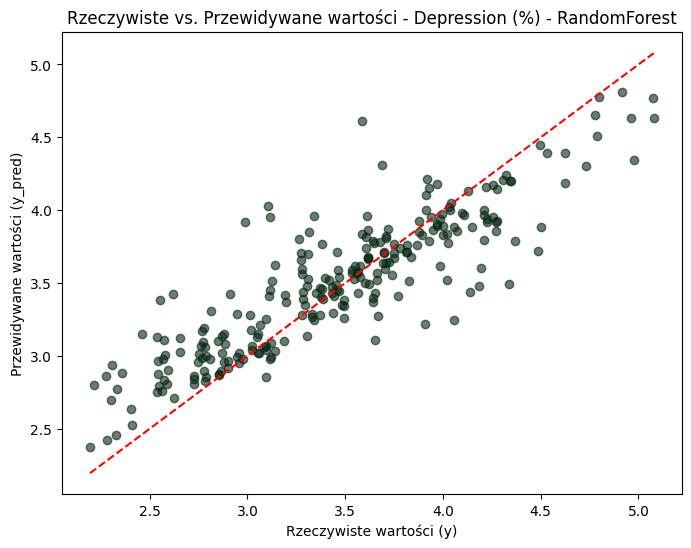

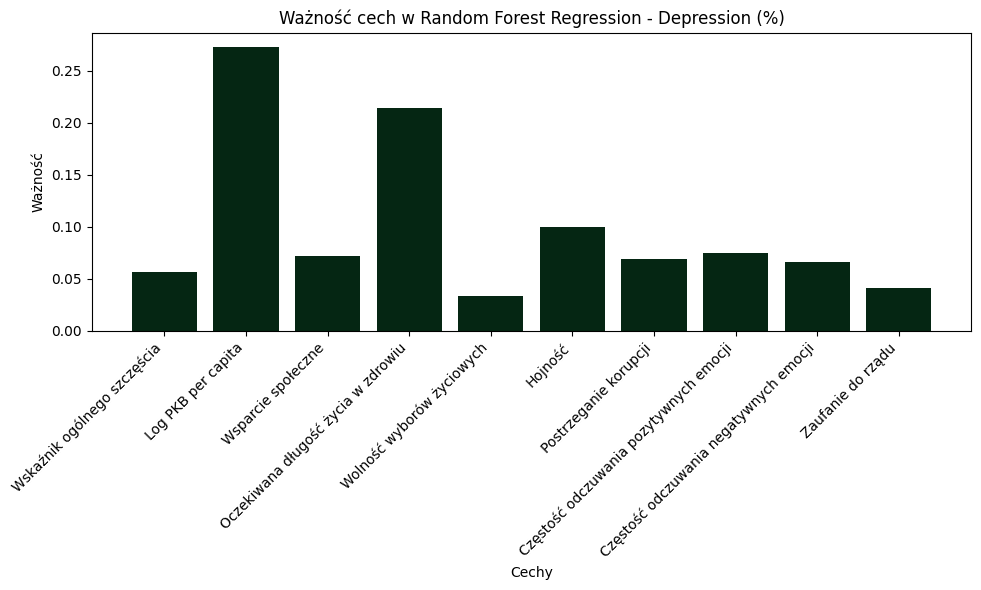

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

cleared_df = merged_df.dropna(subset=[
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity', 
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government',
    'Depression (%)'
])

X = cleared_df[[
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity',                  
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government'
]]
y = cleared_df['Depression (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Automatyczne dobieranie liczby drzew
n_estimators_range = range(10, 200, 10)
mean_scores = []

for n in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_scores.append(np.mean(scores))

optimal_n_estimators = n_estimators_range[np.argmax(mean_scores)]
print(f"Optymalna liczba drzew: {optimal_n_estimators}")

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mean_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Liczba drzew (n_estimators)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ liczby drzew na jakość modelu - Depression (%)')
plt.grid()
plt.show()

# Automatyczne dobieranie maksymalnej głębokości
max_depth_range = [None] + list(range(2, 21))
mean_scores_depth = []

for depth in max_depth_range:
    model = RandomForestRegressor(n_estimators=optimal_n_estimators, max_depth=depth, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_scores_depth.append(np.mean(scores))

optimal_max_depth = max_depth_range[np.argmax(mean_scores_depth)]
print(f"Optymalna maksymalna głębokość: {optimal_max_depth}")

plt.figure(figsize=(10, 6))
plt.plot([str(d) for d in max_depth_range], mean_scores_depth, marker='o', linestyle='--', color='g')
plt.xlabel('Maksymalna głębokość (max_depth)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ maksymalnej głębokości na jakość modelu - Depression (%)')
plt.grid()
plt.show()

# Finalny model z optymalnymi parametrami
model = RandomForestRegressor(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, random_state=42)
model.fit(X_train_scaled, y_train)

# Predykcja i ocena
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#052613', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Rzeczywiste vs. Przewidywane wartości - Depression (%) - RandomForest')
plt.xlabel('Rzeczywiste wartości (y)')
plt.ylabel('Przewidywane wartości (y_pred)')
plt.show()

# Ważność cech
feature_importances = model.feature_importances_

feature_names = [
    'Wskaźnik ogólnego szczęścia',   
    'Log PKB per capita',
    'Wsparcie społeczne', 
    'Oczekiwana długość życia w zdrowiu',    
    'Wolność wyborów życiowych',
    'Hojność',                  
    'Postrzeganie korupcji',        
    'Częstość odczuwania pozytywnych emocji', 
    'Częstość odczuwania negatywnych emocji',              
    'Zaufanie do rządu'
]

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances, color='#052613')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cechy')
plt.ylabel('Ważność')
plt.title('Ważność cech w Random Forest Regression - Depression (%)')
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, we

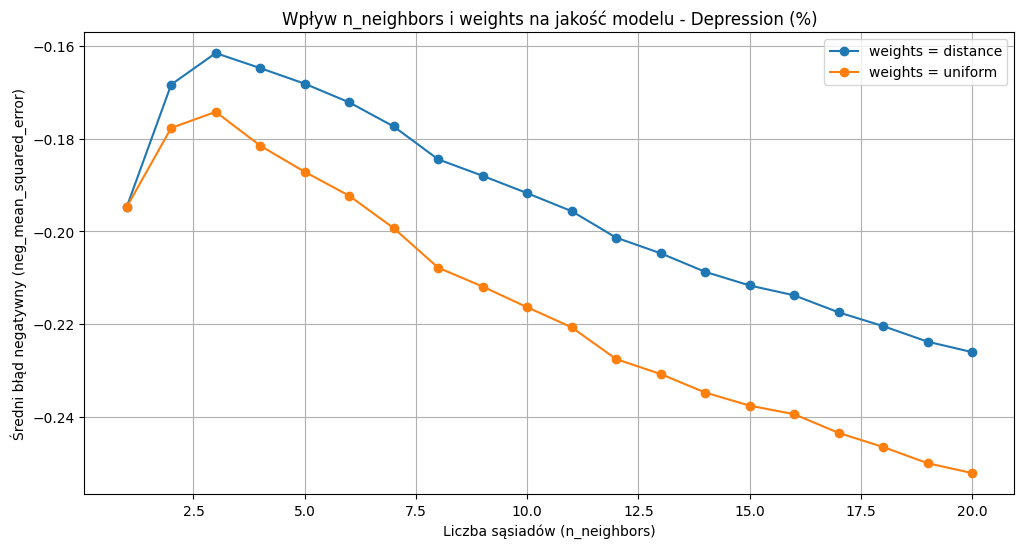

MSE: 0.10652869812154621
RMSE: 0.326387343690815
R²: 0.725798382359217


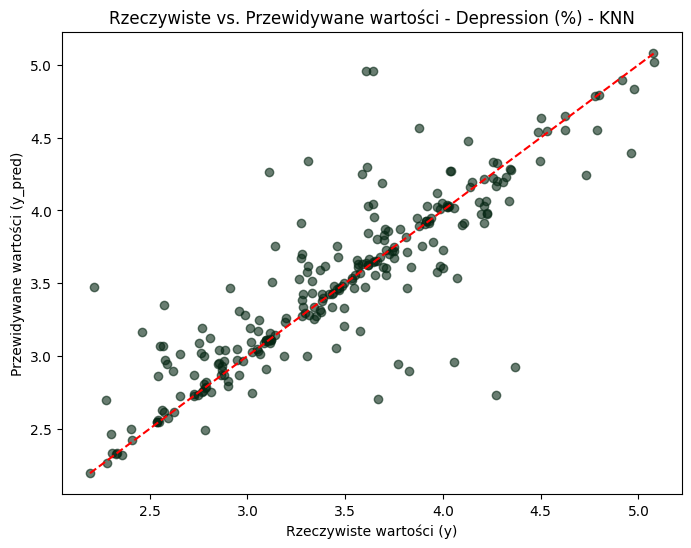

In [19]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Przestrzeń hiperparametrów dla KNeighborsRegressor
param_grid_knn = {
    'n_neighbors': range(1, 21),             # Liczba sąsiadów od 1 do 20
    'weights': ['uniform', 'distance']      # Rodzaj wag
}

# Grid Search dla KNN
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, return_train_score=True)
grid_search_knn.fit(X_train_scaled, y_train)

# Najlepsze parametry dla KNN
best_params_knn = grid_search_knn.best_params_
print(f"Najlepsze parametry dla KNN: {best_params_knn}")

# Uzyskanie wyników z GridSearchCV
results = grid_search_knn.cv_results_

mean_test_scores = results['mean_test_score']
param_n_neighbors = np.array(results['param_n_neighbors'], dtype=int)
param_weights = np.array(results['param_weights'], dtype=str)

# Wizualizacja wyników dla każdego rodzaju wag
plt.figure(figsize=(12, 6))
for weight in np.unique(param_weights):
    mask = param_weights == weight
    plt.plot(
        param_n_neighbors[mask],
        mean_test_scores[mask],
        marker='o',
        label=f'weights = {weight}'
    )

plt.xlabel('Liczba sąsiadów (n_neighbors)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ n_neighbors i weights na jakość modelu - Depression (%)')
plt.legend()
plt.grid()
plt.show()

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# Obliczanie metryk
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mse_knn ** 0.5
r2_knn = r2_score(y_test, y_pred_knn)

print(f"MSE: {mse_knn}")
print(f"RMSE: {rmse_knn}")
print(f"R²: {r2_knn}")

# Wykres: Rzeczywiste vs Przewidywane wartości
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='#052613', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Rzeczywiste vs. Przewidywane wartości - Depression (%) - KNN')
plt.xlabel('Rzeczywiste wartości (y)')
plt.ylabel('Przewidywane wartości (y_pred)')
plt.show()

Optymalna liczba drzew: 190


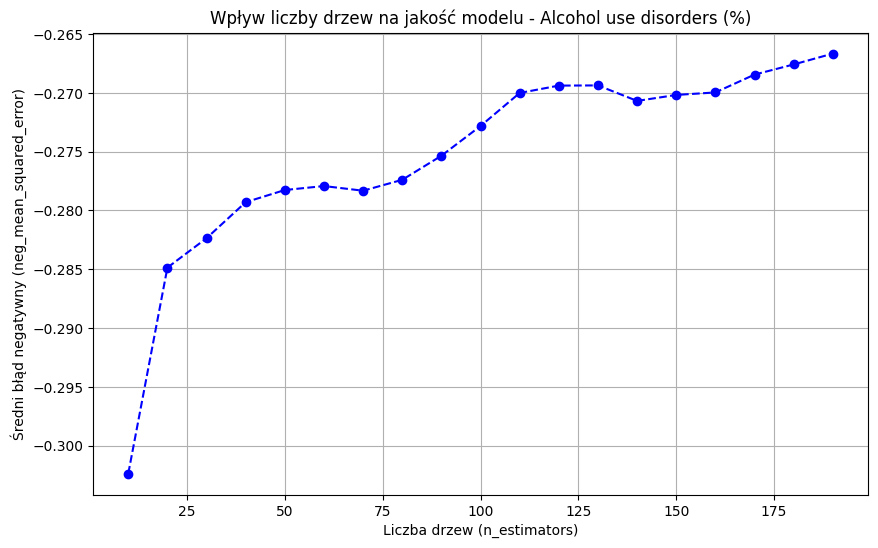

Optymalna maksymalna głębokość: 20


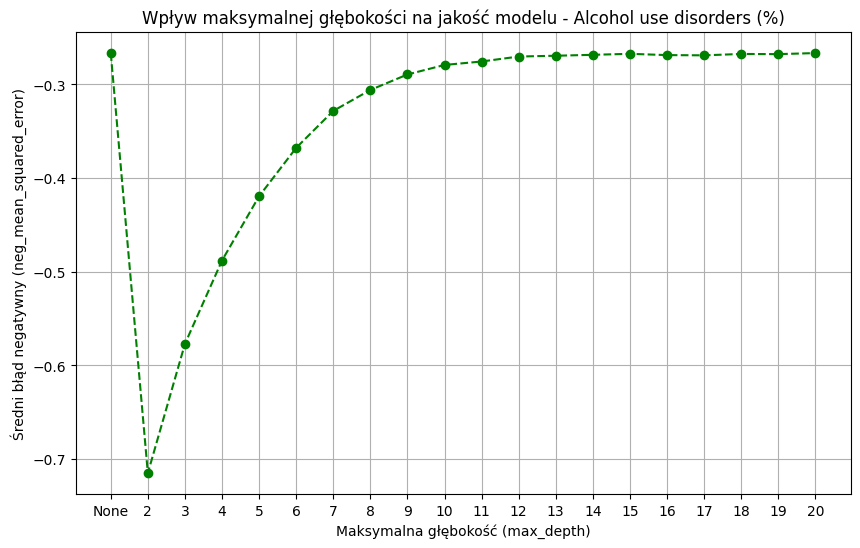

MSE: 0.21268698939869154
RMSE: 0.46117999674605525
R²: 0.7822050365352393


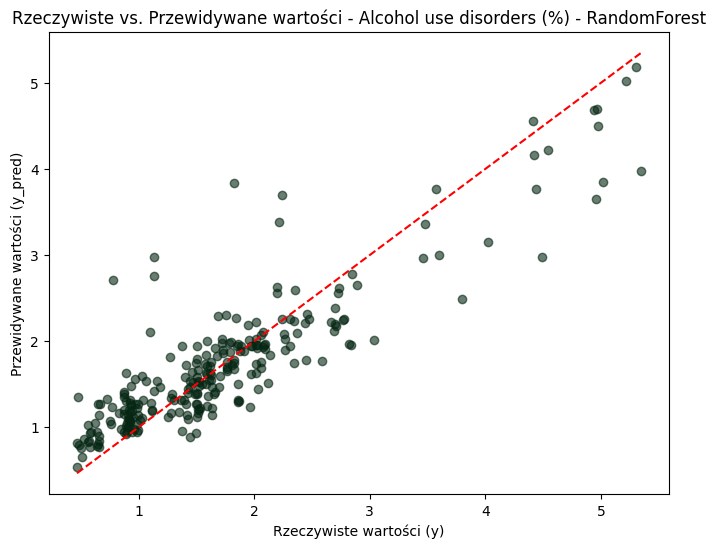

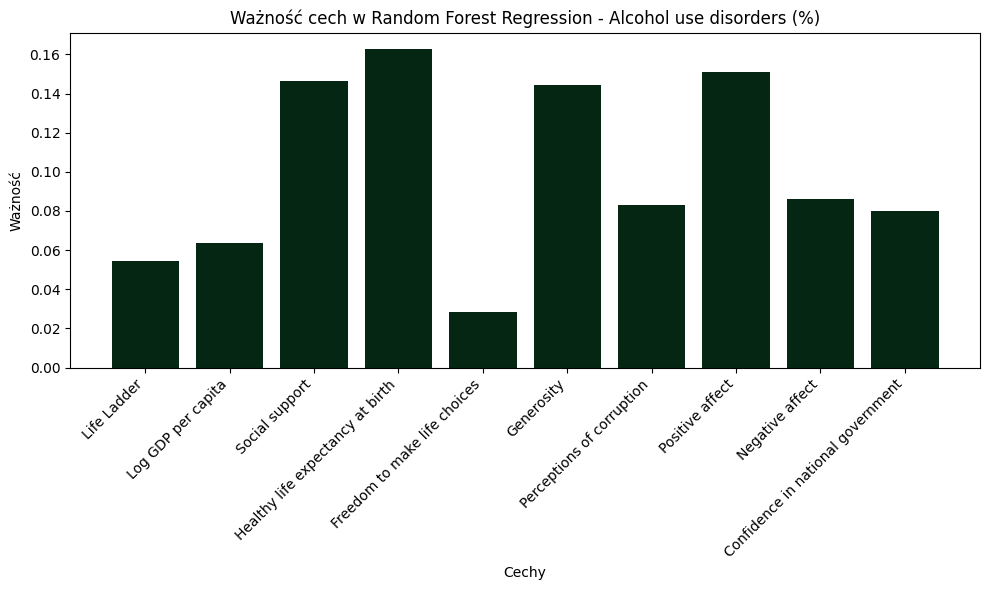

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

cleared_df = merged_df.dropna(subset=[
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity', 
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government',
    'Alcohol use disorders (%)'
])

X = cleared_df[[
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity',                  
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government'
]]
y = cleared_df['Alcohol use disorders (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Automatyczne dobieranie liczby drzew
n_estimators_range = range(10, 200, 10)
mean_scores = []

for n in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_scores.append(np.mean(scores))

optimal_n_estimators = n_estimators_range[np.argmax(mean_scores)]
print(f"Optymalna liczba drzew: {optimal_n_estimators}")

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mean_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Liczba drzew (n_estimators)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ liczby drzew na jakość modelu - Alcohol use disorders (%)')
plt.grid()
plt.show()

# Automatyczne dobieranie maksymalnej głębokości
max_depth_range = [None] + list(range(2, 21))
mean_scores_depth = []

for depth in max_depth_range:
    model = RandomForestRegressor(n_estimators=optimal_n_estimators, max_depth=depth, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_scores_depth.append(np.mean(scores))

optimal_max_depth = max_depth_range[np.argmax(mean_scores_depth)]
print(f"Optymalna maksymalna głębokość: {optimal_max_depth}")

plt.figure(figsize=(10, 6))
plt.plot([str(d) for d in max_depth_range], mean_scores_depth, marker='o', linestyle='--', color='g')
plt.xlabel('Maksymalna głębokość (max_depth)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ maksymalnej głębokości na jakość modelu - Alcohol use disorders (%)')
plt.grid()
plt.show()

# Finalny model z optymalnymi parametrami
model = RandomForestRegressor(n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, random_state=42)
model.fit(X_train_scaled, y_train)

# Predykcja i ocena
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#052613', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Rzeczywiste vs. Przewidywane wartości - Alcohol use disorders (%) - RandomForest')
plt.xlabel('Rzeczywiste wartości (y)')
plt.ylabel('Przewidywane wartości (y_pred)')
plt.show()

# Ważność cech
feature_importances = model.feature_importances_

feature_names = [
    'Life Ladder',   
    'Log GDP per capita',
    'Social support', 
    'Healthy life expectancy at birth',    
    'Freedom to make life choices',
    'Generosity',                  
    'Perceptions of corruption',        
    'Positive affect', 
    'Negative affect',              
    'Confidence in national government'
]

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances, color='#052613')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cechy')
plt.ylabel('Ważność')
plt.title('Ważność cech w Random Forest Regression - Alcohol use disorders (%)')
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s

[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, we

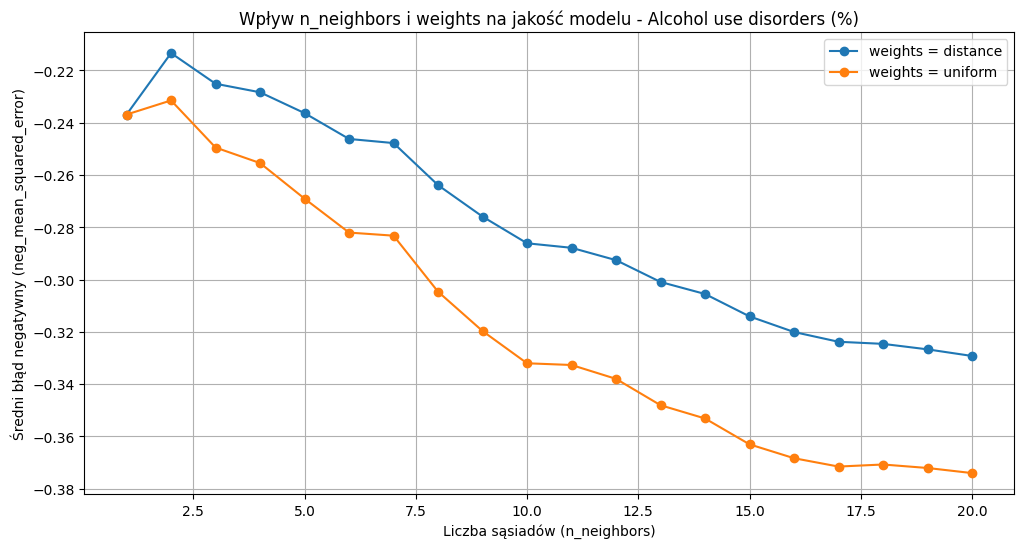

MSE: 0.09865523900483242
RMSE: 0.31409431546086986
R²: 0.8989754181230754


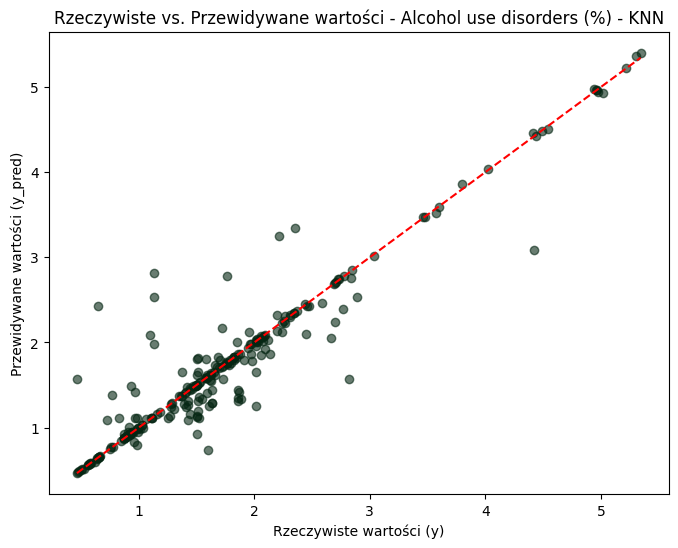

In [21]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Przestrzeń hiperparametrów dla KNeighborsRegressor
param_grid_knn = {
    'n_neighbors': range(1, 21),             # Liczba sąsiadów od 1 do 20
    'weights': ['uniform', 'distance']      # Rodzaj wag
}

# Grid Search dla KNN
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, return_train_score=True)
grid_search_knn.fit(X_train_scaled, y_train)

# Najlepsze parametry dla KNN
best_params_knn = grid_search_knn.best_params_
print(f"Najlepsze parametry dla KNN: {best_params_knn}")

# Uzyskanie wyników z GridSearchCV
results = grid_search_knn.cv_results_

mean_test_scores = results['mean_test_score']
param_n_neighbors = np.array(results['param_n_neighbors'], dtype=int)
param_weights = np.array(results['param_weights'], dtype=str)

# Wizualizacja wyników dla każdego rodzaju wag
plt.figure(figsize=(12, 6))
for weight in np.unique(param_weights):
    mask = param_weights == weight
    plt.plot(
        param_n_neighbors[mask],
        mean_test_scores[mask],
        marker='o',
        label=f'weights = {weight}'
    )

plt.xlabel('Liczba sąsiadów (n_neighbors)')
plt.ylabel('Średni błąd negatywny (neg_mean_squared_error)')
plt.title('Wpływ n_neighbors i weights na jakość modelu - Alcohol use disorders (%)')
plt.legend()
plt.grid()
plt.show()

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# Obliczanie metryk
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mse_knn ** 0.5
r2_knn = r2_score(y_test, y_pred_knn)

print(f"MSE: {mse_knn}")
print(f"RMSE: {rmse_knn}")
print(f"R²: {r2_knn}")

# Wykres: Rzeczywiste vs Przewidywane wartości
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='#052613', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Rzeczywiste vs. Przewidywane wartości - Alcohol use disorders (%) - KNN')
plt.xlabel('Rzeczywiste wartości (y)')
plt.ylabel('Przewidywane wartości (y_pred)')
plt.show()

In [22]:
#dodać mapke dla depresji